### File name to be used in this analysis:

In [236]:
FILE_NAME = 'results_fcfs-400-0,4.csv'

### Imports:

In [237]:
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from typing import List

### Função para plotar gráficos, a qual pode ser usada ao fim desse notebook

In [254]:
def plot(y: List[List], x: List = [], label: List = [], x_label: str = '', y_label: str = '') -> None:
    plt.rcParams["figure.figsize"] = [22.50, 7.50]
    x = x if x else [k+1 for k in range(len(y[0]))]
    label = label if label else ['']*len(y)
    for lab, yi in zip(label, y):
        plt.plot(x, yi, label=lab)
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.legend(bbox_to_anchor=(1.1, 1.0))
    
    plt.show()

### Initializing our DataFrame

In [239]:
df = pd.read_csv(FILE_NAME, delimiter=',', header=None, names=['batch', 'E_W', 'E_Nq'], skiprows=1)

In [240]:
df['E_W'] = df['E_W'].map(lambda x: float(x))
df['E_Nq'] = df['E_Nq'].map(lambda x: float(x))


In [241]:
df

,batch,E_W,E_Nq
0,1,0.0,0.0
1,2,0.0,0.0
2,3,0.0,0.0
3,4,0.0,0.0
4,5,0.0,0.0
...,...,...,...
95,96,0.0,0.0
96,97,0.0,0.0
97,98,0.0,0.0
98,99,0.0,0.0


### Mean for E[W] and E[Nq]:

In [242]:
avgs = []
avgs.append(df['E_W'].mean())
avgs.append(df['E_Nq'].mean())
avgs

[0.0, 0.0]

### Variance for E[W] and E[Nq]:

In [243]:
soma = np.zeros(2)
for index, row in df.iterrows():
    soma[0] += (row['E_W'] - avgs[0])**2
    soma[1] += (row['E_Nq'] - avgs[1])**2
var = soma * 1/(len(df) - 1)
display(var)

array([0., 0.])

### T-Student for mean(W) and mean(Nq):

In [244]:
mean_width_ic = [sqrt(var[0])/sqrt(len(df)), sqrt(var[1])/sqrt(len(df))]
mean_IC_w = (avgs[0] - 1.96*mean_width_ic[0], avgs[0] + 1.96*mean_width_ic[0])
mean_IC_nq = (avgs[1] - 1.96*mean_width_ic[1], avgs[1] + 1.96*mean_width_ic[1])

In [245]:
print(f"IC da média de W: {mean_IC_w}")
print(f"IC da média de Nq: {mean_IC_nq}")

IC da média de W: (0.0, 0.0)
IC da média de Nq: (0.0, 0.0)


In [246]:
mean_accuracy_w = (mean_IC_w[1] - mean_IC_w[0])/(mean_IC_w[1] + mean_IC_w[0])
mean_accuracy_nq = (mean_IC_nq[1] - mean_IC_nq[0])/(mean_IC_nq[1] + mean_IC_nq[0])

print(f"W mean precision: {mean_accuracy_w}\nNq mean precision: {mean_accuracy_nq}")

W mean precision: nan
Nq mean precision: nan


<ipython-input-246-c575bad9e808>:1: RuntimeWarning: invalid value encountered in double_scalars
  mean_accuracy_w = (mean_IC_w[1] - mean_IC_w[0])/(mean_IC_w[1] + mean_IC_w[0])
<ipython-input-246-c575bad9e808>:2: RuntimeWarning: invalid value encountered in double_scalars
  mean_accuracy_nq = (mean_IC_nq[1] - mean_IC_nq[0])/(mean_IC_nq[1] + mean_IC_nq[0])


### Chi-Square for Var(W) and Var(Nq):

In [247]:
X2right = 3357.7 # df = 3199 | p = 0.025
X2left  = 3044.1 # df = 3199 | p = 0.975
var_IC_w = (((len(df)-1) * var[0])/X2right, ((len(df)-1) * var[0])/X2left)
var_IC_nq = (((len(df)-1) * var[1])/X2right, ((len(df)-1) * var[1])/X2left)

In [248]:
print(f"IC da variância de W: {var_IC_w}")
print(f"IC da variância de Nq: {var_IC_nq}")

IC da variância de W: (0.0, 0.0)
IC da variância de Nq: (0.0, 0.0)


In [249]:
var_accuracy_w = (var_IC_w[1] - var_IC_w[0])/(var_IC_w[1] + var_IC_w[0])
var_accuracy_nq = (var_IC_nq[1] - var_IC_nq[0])/(var_IC_nq[1] + var_IC_nq[0])

print(f"W var precision: {var_accuracy_w}\nNq var precision: {var_accuracy_nq}")

W var precision: nan
Nq var precision: nan


<ipython-input-249-57b5afa22bae>:1: RuntimeWarning: invalid value encountered in double_scalars
  var_accuracy_w = (var_IC_w[1] - var_IC_w[0])/(var_IC_w[1] + var_IC_w[0])
<ipython-input-249-57b5afa22bae>:2: RuntimeWarning: invalid value encountered in double_scalars
  var_accuracy_nq = (var_IC_nq[1] - var_IC_nq[0])/(var_IC_nq[1] + var_IC_nq[0])


### T-Student for Var(W) and Var(Nq): (TODO)

In [250]:
mean_width_ic_2 = [mean_width_ic[0]/avgs[0], mean_width_ic[1]/avgs[1]]

var_IC_w_2 = (var[0] - 1.96*mean_width_ic_2[0], var[0] + 1.96*mean_width_ic_2[0])
var_IC_nq_2 = (var[1] - 1.96*mean_width_ic_2[1], var[1] + 1.96*mean_width_ic_2[1])

<ipython-input-250-31611d21d0e2>:1: RuntimeWarning: invalid value encountered in double_scalars
  mean_width_ic_2 = [mean_width_ic[0]/avgs[0], mean_width_ic[1]/avgs[1]]


In [251]:
print(f"IC da variância de W: {var_IC_w_2}")
print(f"IC da variância de Nq: {var_IC_nq_2}")

IC da variância de W: (nan, nan)
IC da variância de Nq: (nan, nan)


In [252]:
var_accuracy_w_2 = (var_IC_w_2[1] - var_IC_w_2[0])/(var_IC_w_2[1] + var_IC_w_2[0])
var_accuracy_nq_2 = (var_IC_nq_2[1] - var_IC_nq_2[0])/(var_IC_nq_2[1] + var_IC_nq_2[0])

print(f"W var precision: {var_accuracy_w_2}\nNq var precision: {var_accuracy_nq_2}")

W var precision: nan
Nq var precision: nan


### Plotting desired data

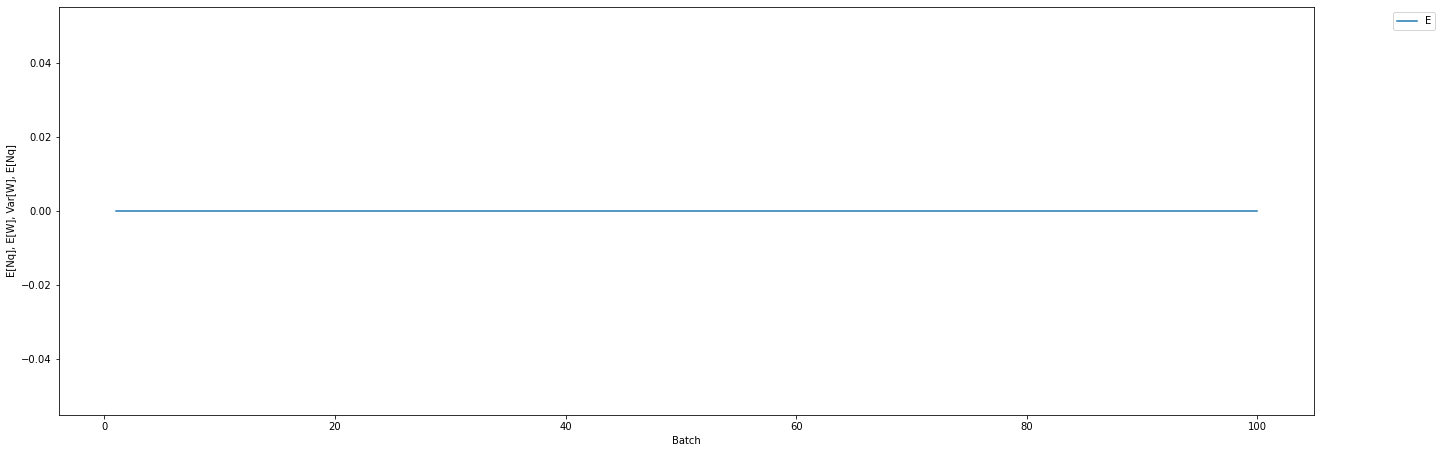

In [256]:
# average_E_Nq = []
# for i in range(1, len(df['E_Nq'])+1):
#     average_E_Nq.append(sum(df['E_Nq'][:i])/i)

plot([df['E_Nq'], df[]], label='E[Nq]', x_label='Batch', y_label='E[Nq], E[W], Var[W], E[Nq]')